<a href="https://colab.research.google.com/github/renomrcll/twitter-sentiment-analysis/blob/master/Twitter_Sentiment_Analysis_using_Data_Scrapping_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reno Marcello Mohammad - 19/439821/TK/48551**

Sentimen Analisis Twitter menggunakan twint untuk data scrapping. Data yang dilakukan scrape yaitu tweet warga twitter dengan keyword 'omicron variant', akan dilihat sentimen positif dan sentimen negatifnya dari tweet-tweet tersebut.

# **Menginstall Twint**

In [ ]:
import os
from google.colab import output
!pip install twint
!pip uninstall twint -y
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint/twint/
!sed -i 's/tweet_count = 100/tweet_count = 100 if not config.Limit else config.Limit/g' url.py
%cd ..
!pip3 install . -r requirements.txt
%cd ..
output.clear()

In [ ]:
# mengubah baris pertama pada requirements menjadi aiohttp==3.7.0
%cd twint/
req_file = open("requirements.txt")
string_list = req_file.readlines()
req_file.close()
print(string_list)
string_list[0] = "aiohttp==3.7.0\n"
req_file = open("requirements.txt", "w")
req_file.write("".join(string_list))
req_file.close()

/content/twint
['aiohttp\n', 'aiodns\n', 'beautifulsoup4\n', 'cchardet\n', 'dataclasses\n', 'elasticsearch\n', 'pysocks\n', 'pandas>=0.23.0\n', 'aiohttp_socks<=0.4.1\n', 'schedule\n', 'geopy\n', 'fake-useragent\n', 'googletransx\n']


In [ ]:
!pip3 install . -r requirements.txt
output.clear()

In [ ]:
pip install twython

# **Melakukan Scrapping Data**

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import nest_asyncio
nest_asyncio.apply()
import twint
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

Fungsi scrapping dengan jangka waktu tiga bulan yang menghasilkan output file csv

In [ ]:
from datetime import datetime

def twint_run(query_text):
    c = twint.Config()
    c.Search = query_text
    c.Since = '2021-9-13'
    c.Until = '2021-12-13'
    c.User_full = True
    c.Pandas = True
    c.Lowercase = True
    c.Profile_full = True
    c.Pandas_clean = True
    c.Limit = 5000
    c.Store_csv = True
    twint.run.Search(c)
    Tweets_df = twint.storage.panda.Tweets_df
    csv_path = '/content/drive/MyDrive/csv/tweet.csv'
    # save text only
    Tweets_df.to_csv(csv_path, columns=['tweet'], index=False, header=False)
    Tweets_df.to_csv(csv_path)
    return csv_path


In [ ]:
twint_run("omicron variant")

Streaming output truncated to the last 5000 lines.
1470181534338539521 2021-12-12 23:59:27 +0000 <JaylenWinebarg1> @AngelSk87757691 Also, I would have stopped when they the vaccinated were more prone to “the new omicron variant.”
1470181511286640645 2021-12-12 23:59:21 +0000 <Parabellum2021> @th3v0t4ry You. Know. That. 🤣
1470181483763716097 2021-12-12 23:59:15 +0000 <chloeingram> Boris’s briefing this evening is going to spook many into staying in over the next few weeks, despite the fact that every indication is that Omicron is milder than other variants. The main thing that will die in this “wave” is the hospitality sector.
1470181470203437060 2021-12-12 23:59:11 +0000 <WakeUpAmericaDR> WHO: No Deaths Reported as a Result of Omicron Variant to Date  https://t.co/V34N9BTBm6
1470181425878028293 2021-12-12 23:59:01 +0000 <rnaguru> @JenniferKShea @RobDelatolla @doug_manuel Wondering what omicron ww:case ratio will look like @PatrickAoust @RobDelatolla? I'm guessing very low. Hoping this 

'/content/drive/MyDrive/csv/tweet.csv'

# **Menyiapkan Dataset**

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

Membuat dataframe dari dataset yang telah dibuat

In [ ]:
tweet_df=pd.read_csv('/content/drive/MyDrive/csv/tweet.csv')
tweet_df

Unnamed: 0                   id  ...  trans_src  trans_dest
0              0  1470181620837588994  ...        NaN         NaN
1              1  1470181605562011655  ...        NaN         NaN
2              2  1470181602999160833  ...        NaN         NaN
3              3  1470181563241574403  ...        NaN         NaN
4              4  1470181534338539521  ...        NaN         NaN
...          ...                  ...  ...        ...         ...
4999        4999  1470058991396995082  ...        NaN         NaN
5000        5000  1470058988020633610  ...        NaN         NaN
5001        5001  1470058973667733516  ...        NaN         NaN
5002        5002  1470058948124233729  ...        NaN         NaN
5003        5003  1470058898837049348  ...        NaN         NaN

[5004 rows x 39 columns]

Mengambil kolom yang hanya dibutuhkan yaitu 'tweet'

In [ ]:
tweet_df=tweet_df[['tweet']]
tweet_df.head(10)

tweet
0  Israeli study finds Pfizer Covid booster prote...
1  New York Mayor Bill de Blasio is requiring all...
2  @Xela_Eswor @AanishRockss @vanillaopinions It’...
3  #UK PM: #vaccine #booster shots available for ...
4  @AngelSk87757691 Also, I would have stopped wh...
5                      @th3v0t4ry You. Know. That. 🤣
6  Boris’s briefing this evening is going to spoo...
7  WHO: No Deaths Reported as a Result of Omicron...
8  @JenniferKShea @RobDelatolla @doug_manuel Wond...
9  Unusual Omicron symptom common in many of thos...

In [ ]:
tweet_df.shape

(5004, 1)

# **Mengidentifikasi Sentimen Pada Dataset**

terdapat 3 sentimen, yaitu positif, netral, dan negatif. akan dilabelkan berdasarkan polarity, apabila polarity > 0 maka hasilnya positif, apabila polarity = 0 hasilnya neutral, dan polarity < 0 hasilnya negatif.

In [ ]:
import nltk
from textblob import TextBlob
def polarity_calc(text):
    analysis = TextBlob(text)
    # set polarity 
    return analysis.sentiment.polarity

In [ ]:
tweet_df['polarity']=tweet_df['tweet'].apply(polarity_calc)
tweet_df.head()

tweet  polarity
0  Israeli study finds Pfizer Covid booster prote...  0.000000
1  New York Mayor Bill de Blasio is requiring all...  0.090909
2  @Xela_Eswor @AanishRockss @vanillaopinions It’...  0.190625
3  #UK PM: #vaccine #booster shots available for ...  0.400000
4  @AngelSk87757691 Also, I would have stopped wh...  0.318182

In [ ]:
def sentiment_calc(text):
    analysis = TextBlob(text)
    # set sentiment 
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [ ]:
tweet_df['sentiment']=tweet_df['tweet'].apply(sentiment_calc)
tweet_df

tweet  polarity sentiment
0     Israeli study finds Pfizer Covid booster prote...  0.000000   neutral
1     New York Mayor Bill de Blasio is requiring all...  0.090909  positive
2     @Xela_Eswor @AanishRockss @vanillaopinions It’...  0.190625  positive
3     #UK PM: #vaccine #booster shots available for ...  0.400000  positive
4     @AngelSk87757691 Also, I would have stopped wh...  0.318182  positive
...                                                 ...       ...       ...
4999  UAE doctors urge uptake of COVID-19 booster sh...  0.000000   neutral
5000  #SkiJumping World Cup events were due to be he...  0.093750  positive
5001  Scotland's seen the biggest daily increase in ...  0.205195  positive
5002  COVID Omicron Variant May Have “Significant” C...  0.187500  positive
5003  ଦେଶରେ କ୍ଷିପ୍ର ଗତିରେ ବ୍ୟାପୁଛି ଓମିକ୍ରନ୍ ଭାରିଆଣ୍ଟ...  0.000000   neutral

[5004 rows x 3 columns]

In [ ]:
tweet_df.loc[tweet_df['sentiment']=='positive']

tweet  polarity sentiment
1     New York Mayor Bill de Blasio is requiring all...  0.090909  positive
2     @Xela_Eswor @AanishRockss @vanillaopinions It’...  0.190625  positive
3     #UK PM: #vaccine #booster shots available for ...  0.400000  positive
4     @AngelSk87757691 Also, I would have stopped wh...  0.318182  positive
6     Boris’s briefing this evening is going to spoo...  0.068333  positive
...                                                 ...       ...       ...
4995  Omicron Threat: Kerala Reports First Case of N...  0.193182  positive
4997  Omicron Threat: Kerala Reports First Case of N...  0.193182  positive
5000  #SkiJumping World Cup events were due to be he...  0.093750  positive
5001  Scotland's seen the biggest daily increase in ...  0.205195  positive
5002  COVID Omicron Variant May Have “Significant” C...  0.187500  positive

[2384 rows x 3 columns]

In [ ]:
tweet_df.loc[tweet_df['sentiment']=='negative']

tweet  polarity sentiment
15    **UPDATE ON CHRISTMAS SOCIAL***  Due to develo... -0.111667  negative
16    I get really confused when I read on #socialme... -0.066667  negative
25    #Omicron variant caused a RISE in profit, of $... -1.000000  negative
33    @c_tiot Probably another 10.  The Delta varian... -0.231818  negative
45    @nb_covid_info @McParts11 @Gov_NB Given the no... -0.500000  negative
...                                                 ...       ...       ...
4990  😭🤣Wow, what a Deal. Crazy! Yet people are goin... -0.062500  negative
4992  U.K. reports that new omicron cases doubled in... -0.011688  negative
4994  This is what the Far Right is doing in Missour... -0.079762  negative
4996  @_primarina I hope she recovers quickly! We go... -0.191667  negative
4998  @DeborahMeaden I would prefer we listened to m... -0.135606  negative

[923 rows x 3 columns]

In [ ]:
tweet_df.loc[tweet_df['sentiment']=='neutral']

tweet  polarity sentiment
0     Israeli study finds Pfizer Covid booster prote...       0.0   neutral
5                         @th3v0t4ry You. Know. That. 🤣       0.0   neutral
7     WHO: No Deaths Reported as a Result of Omicron...       0.0   neutral
11    Molecular Diagnosis Test Can Detect Omicron Va...       0.0   neutral
14    Omicron Electronics calls latest virus variant...       0.0   neutral
...                                                 ...       ...       ...
4984  Pfizer CEO says we may need a fourth vaccine d...       0.0   neutral
4989  وفاقی وزیر تعلیم شفقت محمود نے موسم سرما کی چھ...       0.0   neutral
4991  Pfizer and BioNTech Provide Update on Omicron ...       0.0   neutral
4999  UAE doctors urge uptake of COVID-19 booster sh...       0.0   neutral
5003  ଦେଶରେ କ୍ଷିପ୍ର ଗତିରେ ବ୍ୟାପୁଛି ଓମିକ୍ରନ୍ ଭାରିଆଣ୍ଟ...       0.0   neutral

[1697 rows x 3 columns]

# **Melakukan Data Cleaning**

menghilangkan username (@names), link dan karakter unik pada tweet

In [ ]:
import re
def preprocessing(tweet):
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('http[^\s]+','',tweet)
    tweet = re.sub('[^a-zA-Z# ]+','',tweet)
    tweet = tweet.lower()
    return tweet
tweet_df['tweet'] = tweet_df['tweet'].apply(preprocessing)

In [ ]:
tweet_df.head(10)

tweet  polarity sentiment
0  israeli study finds pfizer covid booster prote...  0.000000   neutral
1  new york mayor bill de blasio is requiring all...  0.090909  positive
2     its due to the child tax credits which bide...  0.190625  positive
3  #uk pm #vaccine #booster shots available for a...  0.400000  positive
4   also i would have stopped when they the vacci...  0.318182  positive
5                                     you know that   0.000000   neutral
6  boriss briefing this evening is going to spook...  0.068333  positive
7  who no deaths reported as a result of omicron ...  0.000000   neutral
8     wondering what omicron wwcase ratio will lo...  0.002273  positive
9  unusual omicron symptom common in many of thos...  0.133333  positive

menghapus data yang duplikat

In [ ]:
tweet_df=tweet_df.drop_duplicates(subset=['tweet'], keep='first')

melakukan set stopword

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_set = set(stopwords.words("english"))
cleaned_tweets = []

for index, row in tweet_df.iterrows():
    
    # melakukan filtering
    words_without_stopwords = [word for word in row.tweet.split() if not word in stopwords_set]
    
    # membuat list
    cleaned_tweets.append(' '.join(words_without_stopwords))

tweet_df['tweet'] = cleaned_tweets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tweet_df

tweet  polarity sentiment
0     israeli study finds pfizer covid booster prote...  0.000000   neutral
1     new york mayor bill de blasio requiring new yo...  0.090909  positive
2     due child tax credits biden trying make perman...  0.190625  positive
3     #uk pm #vaccine #booster shots available adult...  0.400000  positive
4     also would stopped vaccinated prone new omicro...  0.318182  positive
...                                                 ...       ...       ...
4999  uae doctors urge uptake covid booster shot omi...  0.000000   neutral
5000  #skijumping world cup events due held #sapporo...  0.093750  positive
5001  scotlands seen biggest daily increase confirme...  0.205195  positive
5002  covid omicron variant may significant capabili...  0.187500  positive
5003              #coronavirus #omicron #omicronvariant  0.000000   neutral

[4565 rows x 3 columns]

# **Proses Analisis**

**Melakukan Tokenisasi dan Lemmatisasi**

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
# tokenisasi
tokenized_tweet = tweet_df['tweet'].apply(lambda x: x.split())
# mencari lemma
word_lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
# menggabungkan token
for i, tokens in enumerate(tokenized_tweet):
    tokenized_tweet[i] = ' '.join(tokens)

tweet_df['tweet'] = tokenized_tweet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Melakukan Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(tweet_df['tweet'].astype(str))

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(tweet_df['tweet'].astype(str))

**Membuat Model**

In [ ]:
target_variable = tweet_df['sentiment'].apply(lambda x: 0 if x=='negative' else 1 )

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
def naive_model(X_train, X_test, y_train, y_test):
    naive_classifier = GaussianNB()
    naive_classifier.fit(X_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(X_test.toarray())
    
    # calculating f1 score
    print(f'F1 Score - {f1_score(y_test, predictions)}')

**Melakukain Train Model**

Menggunakan BOW

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bow_word_feature, target_variable, test_size=0.3, random_state=870)
naive_model(X_train, X_test, y_train, y_test)

F1 Score - 0.7126903553299493


Menggunakan TFIDF

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=870)
naive_model(X_train, X_test, y_train, y_test)

F1 Score - 0.7149367088607596


In [ ]:
from sklearn.metrics import classification_report
naive_classifier = GaussianNB()
naive_classifier.fit(X_train.toarray(), y_train)

# predictions over test set
predictions = naive_classifier.predict(X_test.toarray())
print ('\n*Classification Report:\n', classification_report(y_test, predictions))


*Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.35      0.26       292
           1       0.79      0.65      0.71      1078

    accuracy                           0.59      1370
   macro avg       0.50      0.50      0.49      1370
weighted avg       0.66      0.59      0.62      1370



# **Visualisasi Data**

**Grafik Persentase Sentiment**

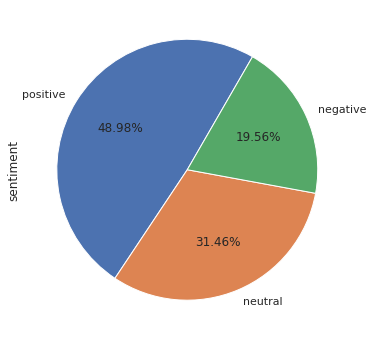

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
tweet_df['sentiment'].value_counts().plot(kind='pie',autopct='%1.2f%%',startangle=60)

In [ ]:
def persentase_sentiment(data,feature):
  total=data.loc[:,feature].value_counts(dropna=False)
  percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
  return pd.concat([total,percentage],axis=1,keys=['total','persentase'])
#Count_values for sentiment
persentase_sentiment(tweet_df,'sentiment')

total  persentase
positive   2236       48.98
neutral    1436       31.46
negative    893       19.56

**Grafik Polarity**

In [ ]:
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

cf.go_offline()
init_notebook_mode(connected=False)
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
configure_plotly_browser_state()
tweet_df['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')
plt.show()

title tidak keluar pada iplot, untuk keterangan, y-title = count , x-title = polarity

**Top 10 Polarity**

In [ ]:
top10_polarity = tweet_df[['polarity','tweet']].sort_values('polarity', ascending=False).head(10)
top10_polarity

polarity                                              tweet
256        1.0                        omicron variant # # # # # #
4105       1.0  ramaphosa slam west travel ban call hypocrite ...
1913       1.0              case omicron variant covid found ohio
1762       1.0  deliberately overreacting new variant order di...
3564       1.0  virus isnt planned omicron spreading faster ex...
1600       1.0  omicron variant overwhelmed nobody even south ...
1154       1.0  fibonacci et compagnie ont dmontr moins daffin...
2316       1.0  go boris johnson address need speak evening im...
1202       1.0  thank god youre feeling better delta certainly...
2379       1.0  isral beperkt het reizen van haar inwoners naa...

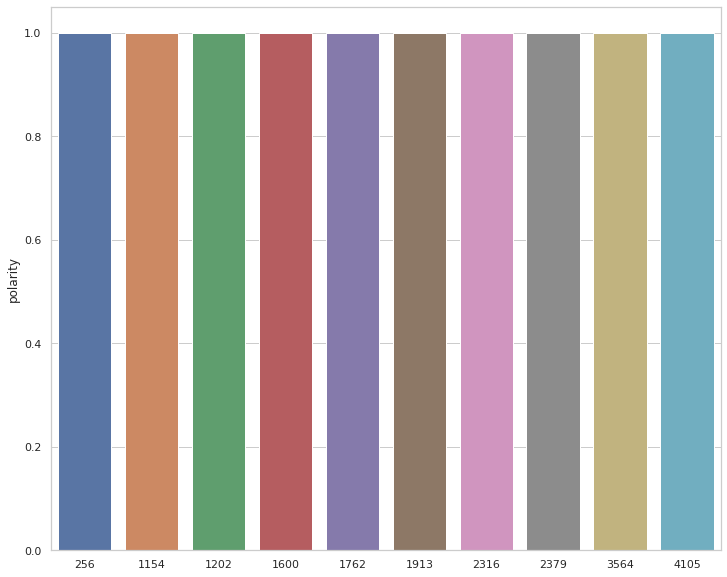

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x=top10_polarity['tweet'].index, y=top10_polarity['polarity'])
plt.show()

**Top 10 Negative Polarity**

In [ ]:
top10_npolarity = tweet_df[['polarity','tweet']].sort_values('polarity', ascending=True).head(10)
top10_npolarity

polarity                                              tweet
2065      -1.0     omicron patient vaccinated mean variant vaxxed
2246      -1.0  nh dont need worry omicron variant buckin eeji...
1045      -1.0  yet using science based article show mutation ...
1953      -1.0                 omicron variant detected ohio wtrf
3015      -1.0  could audience skittish going back theater fac...
2958      -1.0  nc university student hope omicron variant dis...
858       -1.0  symptom variant compared common cold zero deat...
106       -1.0  researcher analyze sacramento wastewater findi...
254       -1.0  one anywhere say despite million omicron infec...
25        -1.0  #omicron variant caused rise profit billion sh...

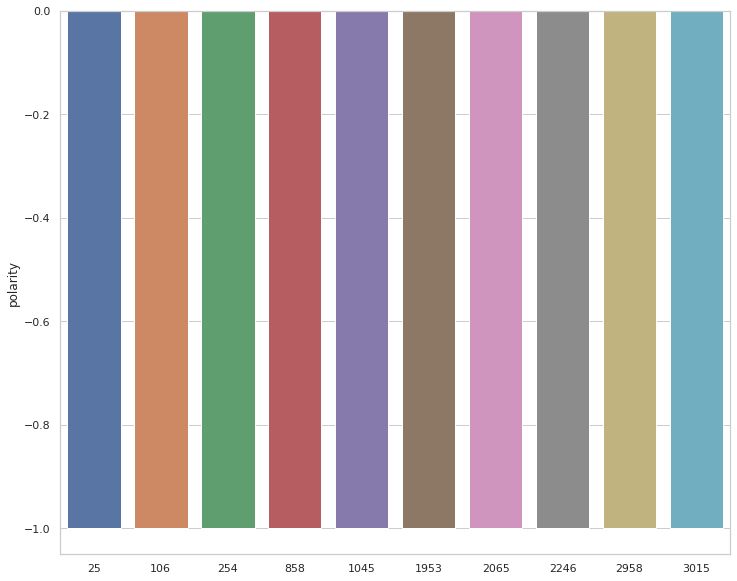

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x=top10_npolarity['tweet'].index, y=top10_npolarity['polarity'])
plt.show()

**Wordcloud**

In [ ]:
wc_pos = tweet_df[ tweet_df['sentiment'] == 'positive']
wc_pos = wc_pos['tweet']
wc_net = tweet_df[ tweet_df['sentiment'] == 'neutral']
wc_net = wc_net['tweet']
wc_neg = tweet_df[ tweet_df['sentiment'] == 'negative']
wc_neg = wc_neg['tweet']


def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


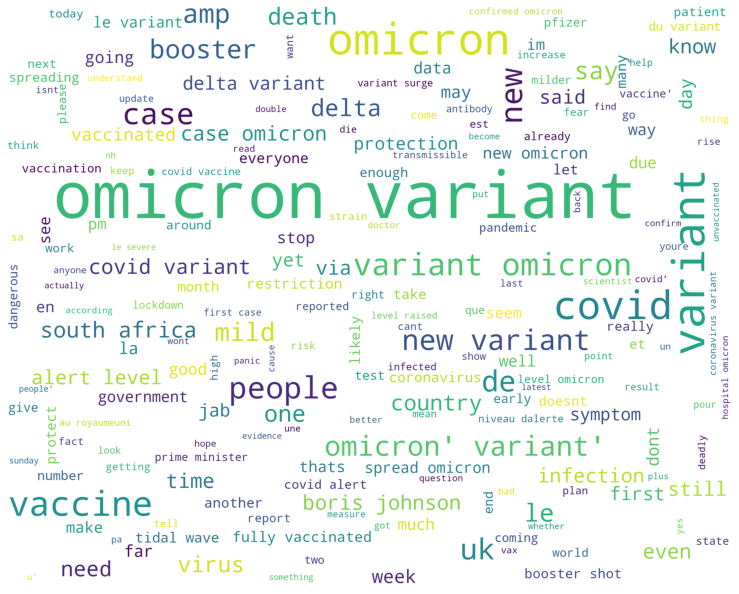

Neutral words


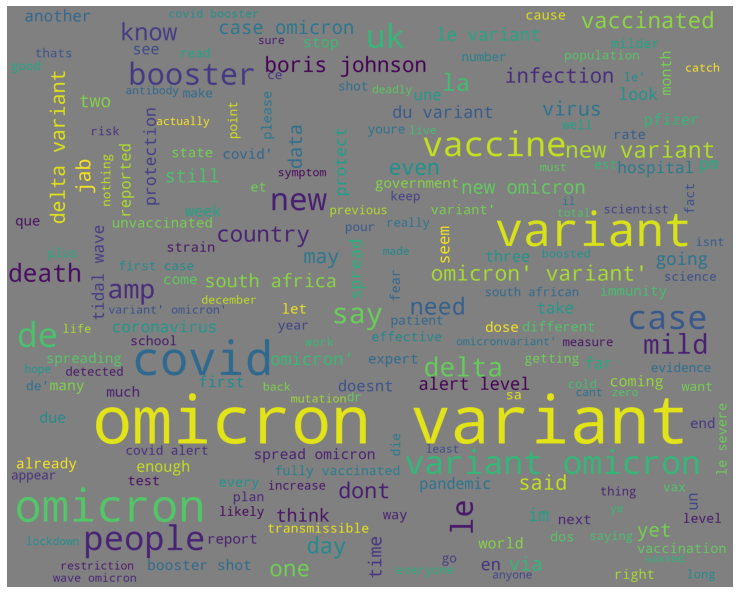

Negative words


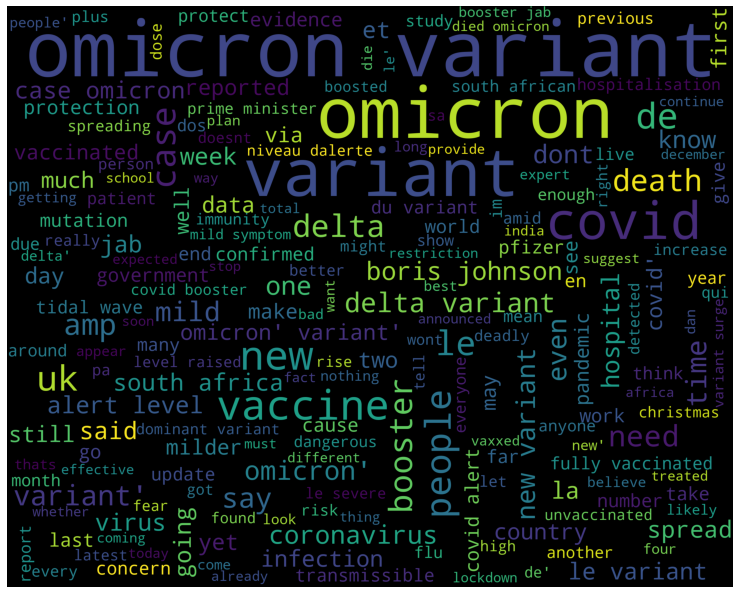

In [ ]:
print("Positive words")
wordcloud_draw(wc_pos.astype(str),'white')
print("Neutral words")
wordcloud_draw(wc_net.astype(str),'gray')
print("Negative words")
wordcloud_draw(wc_neg.astype(str))